## <center>Universidade do Estado do Amazonas</center>
##### <center>Pós-graduação Lato Sensu em Ciência de Dados</center>

<center>

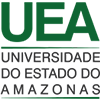

</center>

---

## <center>Código fonte do TCC: Análise dos dados de todos biomas do período de 2019 até 2021</center>
##### <center>**Orientadora:** Msc. Alice Adativa</center>
###### <center>**Aluno:** Daniel Erasmo Leite Soares</center>



---



## Preparação do Ambiente

---



In [2]:
# Pacotes instalados
!pip install geopandas
!pip install contextily
!pip install biokit
!pip install plotly

     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 16.7 MB 45.5 MB/s 
     |████████████████████████████████| 6.3 MB 44.5 MB/s 
     |████████████████████████████████| 19.3 MB 277 kB/s 
     |████████████████████████████████| 162 kB 1.3 MB/s 
     |████████████████████████████████| 47 kB 1.7 MB/s 
     |████████████████████████████████| 1.0 MB 2.8 MB/s 
     |████████████████████████████████| 2.3 MB 6.5 MB/s 
     |████████████████████████████████| 51 kB 229 kB/s 
     |████████████████████████████████| 47 kB 4.6 MB/s 
     |████████████████████████████████| 144 kB 19.5 MB/s 
     |████████████████████████████████| 5.8 MB 14.9 MB/s 
     |████████████████████████████████| 251 kB 47.4 MB/s 
     |████████████████████████████████| 127 kB 49.3 MB/s 
  Created wheel for biokit: filename=biokit-0.5.0-py3-none-any.whl size=177148 sha256=d3e045d4ae30821fbf6a452a55c7d6c1da10e8d2e6baa56e24b0dff23551a7df
  Stored in directory: /root/.cache/pip/wheels

In [3]:
## Bibliotecas de Tratamento de Dados
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import contextily
import numpy as np

## Bibliotecas Gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

## Bibliotecas de ML
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
#from sklearn.cluster import MeanShift
#from sklearn.cluster import estimate_bandwidth

## Carregamento e preparação do DataFrame de todos os Biomas

---



In [4]:
# Montando a pasta do Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# # Criando os DataFrames de focos de queimadas do Brasil
alertas_2019 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/focos_biomas_2019-01-01_2019-12-31.csv')
alertas_2020 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/focos_biomas_2020-01-01_2020-12-31.csv')
alertas_2021 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/focos_biomas_2021-01-01_2021-12-31.csv')
alertas = [alertas_2019, alertas_2020, alertas_2021]
alertas_biomas = pd.concat(alertas)

In [6]:
alertas_biomas

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,PACAJA,Amazonia,2.0,1.6,0.5,-3.60200,-49.96300,201.6
1,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0.0,0.5,0.2,-3.63000,-52.25500,47.5
2,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0.0,0.5,0.2,-3.63100,-52.26400,17.4
3,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0.0,0.5,0.2,-3.64200,-52.26500,12.4
4,2019/10/27 17:05:00,AQUA_M-T,Brasil,AMAZONAS,NOVA OLINDA DO NORTE,Amazonia,0.0,0.3,0.0,-3.65100,-58.25400,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...
184076,2021/08/29 17:05:00,AQUA_M-T,Brasil,TOCANTINS,LAGOA DA CONFUSAO,Cerrado,88.0,0.0,1.0,-10.87773,-50.33506,246.6
184077,2021/08/29 17:05:00,AQUA_M-T,Brasil,MATO GROSSO,NOVO SANTO ANTONIO,Cerrado,104.0,0.0,1.0,-12.37030,-51.13305,10.4
184078,2021/08/29 17:05:00,AQUA_M-T,Brasil,MATO GROSSO,NOVO SANTO ANTONIO,Cerrado,103.0,0.0,1.0,-12.34445,-51.14636,150.6
184079,2021/08/29 17:07:00,AQUA_M-T,Brasil,PARA,PACAJA,Amazonia,2.0,0.0,0.5,-4.08141,-50.88046,19.3


## **Criação o GeoDataFrame e Sistema de Referência de Coordenadas**

---



In [7]:
geometry = [Point(xy) for xy in zip(alertas_biomas['longitude'], alertas_biomas['latitude'])]

In [8]:
alertas_biomas = gpd.GeoDataFrame(alertas_biomas, crs='EPSG:4326', geometry=geometry)

In [9]:
type(alertas_biomas)

geopandas.geodataframe.GeoDataFrame

In [10]:
alertas_biomas

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
0,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,PACAJA,Amazonia,2.0,1.6,0.5,-3.60200,-49.96300,201.6,POINT (-49.96300 -3.60200)
1,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0.0,0.5,0.2,-3.63000,-52.25500,47.5,POINT (-52.25500 -3.63000)
2,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0.0,0.5,0.2,-3.63100,-52.26400,17.4,POINT (-52.26400 -3.63100)
3,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0.0,0.5,0.2,-3.64200,-52.26500,12.4,POINT (-52.26500 -3.64200)
4,2019/10/27 17:05:00,AQUA_M-T,Brasil,AMAZONAS,NOVA OLINDA DO NORTE,Amazonia,0.0,0.3,0.0,-3.65100,-58.25400,12.1,POINT (-58.25400 -3.65100)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184076,2021/08/29 17:05:00,AQUA_M-T,Brasil,TOCANTINS,LAGOA DA CONFUSAO,Cerrado,88.0,0.0,1.0,-10.87773,-50.33506,246.6,POINT (-50.33506 -10.87773)
184077,2021/08/29 17:05:00,AQUA_M-T,Brasil,MATO GROSSO,NOVO SANTO ANTONIO,Cerrado,104.0,0.0,1.0,-12.37030,-51.13305,10.4,POINT (-51.13305 -12.37030)
184078,2021/08/29 17:05:00,AQUA_M-T,Brasil,MATO GROSSO,NOVO SANTO ANTONIO,Cerrado,103.0,0.0,1.0,-12.34445,-51.14636,150.6,POINT (-51.14636 -12.34445)
184079,2021/08/29 17:07:00,AQUA_M-T,Brasil,PARA,PACAJA,Amazonia,2.0,0.0,0.5,-4.08141,-50.88046,19.3,POINT (-50.88046 -4.08141)


In [11]:
alertas_biomas = alertas_biomas.to_crs(crs='EPSG:3857')

In [12]:
alertas_biomas.crs.to_string()

'EPSG:3857'

## **Geração dos gráficos de quantitativos e localização dos focos por Biomas**

In [13]:
alertas_biomas['bioma'].unique()

array(['Amazonia', 'Pantanal', 'Cerrado', 'Caatinga', 'Mata Atlantica',
       'Pampa'], dtype=object)

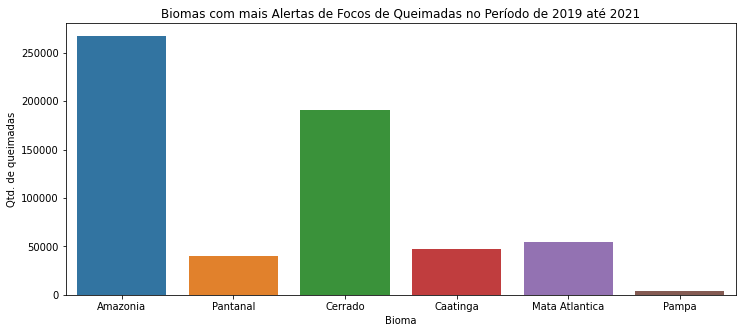

In [14]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='bioma', data=alertas_biomas)
ax.set_title("Biomas com mais Alertas de Focos de Queimadas no Período de 2019 até 2021")
ax.set_xlabel('Bioma')
ax.set_ylabel('Qtd. de queimadas')
plt.show()

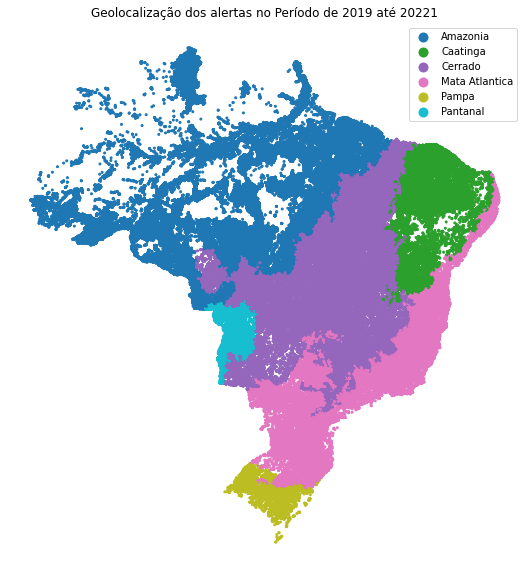

In [15]:
ax = alertas_biomas.plot(figsize=(15, 10), column='bioma', markersize=4, legend=True)
#contextily.add_basemap(ax)
ax.set_axis_off()
ax.set_title("Geolocalização dos alertas no Período de 2019 até 20221")
plt.show()

**DataFrame Pré-Processado**

In [16]:
coord_biomas = alertas_biomas.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])

In [17]:
coord_biomas

,latitude,longitude
0,-3.60200,-49.96300
1,-3.63000,-52.25500
2,-3.63100,-52.26400
3,-3.64200,-52.26500
4,-3.65100,-58.25400
...,...,...
184076,-10.87773,-50.33506
184077,-12.37030,-51.13305
184078,-12.34445,-51.14636
184079,-4.08141,-50.88046


## **Aplicação dos Algoritmos para os Biomas**


*   K-Means

In [18]:
agrupadorK = KMeans(n_clusters=6)

In [19]:
agrupadorK.fit(coord_biomas)

KMeans(n_clusters=6)

In [20]:
agrupadorK.labels_

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [21]:
np.unique(agrupadorK.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [22]:
coord_biomas['Grupo'] = agrupadorK.labels_

In [23]:
coord_biomas

,latitude,longitude,Grupo
0,-3.60200,-49.96300,1
1,-3.63000,-52.25500,1
2,-3.63100,-52.26400,1
3,-3.64200,-52.26500,1
4,-3.65100,-58.25400,1
...,...,...,...
184076,-10.87773,-50.33506,0
184077,-12.37030,-51.13305,0
184078,-12.34445,-51.14636,0
184079,-4.08141,-50.88046,1


**Gráfico com agrupamento por Cluster**

In [24]:
c0lat = coord_biomas[coord_biomas['Grupo']==0]['latitude']
c0lon = coord_biomas[coord_biomas['Grupo']==0]['longitude']
c1lat = coord_biomas[coord_biomas['Grupo']==1]['latitude']
c1lon = coord_biomas[coord_biomas['Grupo']==1]['longitude']
c2lat = coord_biomas[coord_biomas['Grupo']==2]['latitude']
c2lon = coord_biomas[coord_biomas['Grupo']==2]['longitude']
c3lat = coord_biomas[coord_biomas['Grupo']==3]['latitude']
c3lon = coord_biomas[coord_biomas['Grupo']==3]['longitude']
c4lat = coord_biomas[coord_biomas['Grupo']==4]['latitude']
c4lon = coord_biomas[coord_biomas['Grupo']==4]['longitude']
c5lat = coord_biomas[coord_biomas['Grupo']==5]['latitude']
c5lon = coord_biomas[coord_biomas['Grupo']==5]['longitude']

x0 = c0lat 
y0 = c0lon
x1 = c1lat
y1 = c1lon
x2 = c2lat
y2 = c2lon
x3 = c3lat
y3 = c3lon
x4 = c4lat
y4 = c4lon
x5 = c5lat
y5 = c5lon

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(
        x=x0,
        y=y0,
        mode="markers",
        marker=dict(color="paleturquoise")
    )
)

fig.add_trace(
    go.Scatter(
        x=x1,
        y=y1,
        mode="markers",
        marker=dict(color="limegreen")
    )
)

fig.add_trace(
    go.Scatter(
        x=x2,
        y=y2,
        mode="markers",
        marker=dict(color="tomato")
    )
)

fig.add_trace(
    go.Scatter(
        x=x3,
        y=y3,
        mode="markers",
        marker=dict(color="dodgerblue")
    )
)

fig.add_trace(
    go.Scatter(
        x=x4,
        y=y4,
        mode="markers",
        marker=dict(color="rebeccapurple")
    )
)

fig.add_trace(
    go.Scatter(
        x=x5,
        y=y5,
        mode="markers",
        marker=dict(color="yellow")
    )
)

# Add buttons that add shapes
cluster0 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x0), y0=min(y0),
                            x1=max(x0), y1=max(y0),
                            line=dict(color="paleturquoise"))]
cluster1 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x1), y0=min(y1),
                            x1=max(x1), y1=max(y1),
                            line=dict(color="limegreen"))]
cluster2 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x2), y0=min(y2),
                            x1=max(x2), y1=max(y2),
                            line=dict(color="tomato"))]
cluster3 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x3), y0=min(y3),
                            x1=max(x3), y1=max(y3),
                            line=dict(color="dodgerblue"))]
cluster4 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x4), y0=min(y4),
                            x1=max(x4), y1=max(y4),
                            line=dict(color="rebeccapurple"))]
cluster5 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x5), y0=min(y5),
                            x1=max(x5), y1=max(y5),
                            line=dict(color="yellow"))]

fig.update_layout(
    updatemenus=[
        dict(buttons=list([
            dict(label="None",
                 method="relayout",
                 args=["shapes", []]),
            dict(label="Cluster 0",
                 method="relayout",
                 args=["shapes", cluster0]),
            dict(label="Cluster 1",
                 method="relayout",
                 args=["shapes", cluster1]),
            dict(label="Cluster 2",
                 method="relayout",
                 args=["shapes", cluster2]),
            dict(label="Cluster 3",
                 method="relayout",
                 args=["shapes", cluster3]),
            dict(label="Cluster 4",
                 method="relayout",
                 args=["shapes", cluster4]),
            dict(label="Cluster 5",
                 method="relayout",
                 args=["shapes", cluster5]),
            dict(label="All",
                 method="relayout",
                 args=["shapes", cluster0 + cluster1 + cluster2 + cluster3 + cluster4 + cluster5])            
        ]),
        )
    ]
)

In [25]:
# Update remaining layout properties
fig.update_layout(
    title_text="Agrupamentos por Bioma",
    showlegend=False,
)
fig.show()